<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/index.html" target="_blank">XGBoost</a></a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Average-Treatment-Effect" data-toc-modified-id="Average-Treatment-Effect-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Average Treatment Effect</a></span></li></ul></li></ul></li><li><span><a href="#New-Model" data-toc-modified-id="New-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>New Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#Features-Importance" data-toc-modified-id="Features-Importance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Features Importance</a></span><ul class="toc-item"><li><span><a href="#SHAP" data-toc-modified-id="SHAP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://github.com/slundberg/shap" target="_blank">SHAP</a></a></span></li><li><span><a href="#XGBoost-features-importance" data-toc-modified-id="XGBoost-features-importance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score" target="_blank">XGBoost features importance</a></a></span></li></ul></li><li><span><a href="#Practical-Lessons-From-Facebook" data-toc-modified-id="Practical-Lessons-From-Facebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><a href="https://quinonero.net/Publications/predicting-clicks-facebook.pdf" target="_blank">Practical Lessons From Facebook</a></a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Make-a-Submission" data-toc-modified-id="Make-a-Submission-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Make a Submission</a></span></li></ul></li></ul></li></ul></div>

Продолжаем работать над задачей CTR-prediction с использованием датасета от Criteo.

Описание задачи и данных можно посмотреть в notebook'e предыдущей практики (`sgd_logreg_nn/notebooks/ctr_prediction_mllib.ipynb`).

# [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)


Утановим xgboost

In [3]:
!cat ~/.bashrc

# .bashrc

# User specific aliases and functions

alias rm='rm -i'
alias cp='cp -i'
alias mv='mv -i'

# Source global definitions
if [ -f /etc/bashrc ]; then
	. /etc/bashrc
fi
LANG=en_US.UTF-8
LC_CTYPE=en_US.UTF-8
LC_NUMERIC=en_US.UTF-8
LC_TIME=en_US.UTF-8
LC_COLLATE=en_US.UTF-8
LC_MONETARY=en_US.UTF-8
LC_MESSAGES=en_US.UTF-8
LC_PAPER=en_US.UTF-8
LC_NAME=en_US.UTF-8
LC_ADDRESS=en_US.UTF-8
LC_TELEPHONE=en_US.UTF-8
LC_MEASUREMENT=en_US.UTF-8
LC_IDENTIFICATION=en_US.UTF-8
LC_ALL=


In [2]:
!echo 'LANG=en_US.UTF-8' >> ~/.bashrc
!echo LC_CTYPE="en_US.UTF-8" >> ~/.bashrc
!echo LC_NUMERIC="en_US.UTF-8" >> ~/.bashrc
!echo LC_TIME="en_US.UTF-8" >> ~/.bashrc
!echo LC_COLLATE="en_US.UTF-8" >> ~/.bashrc
!echo LC_MONETARY="en_US.UTF-8" >> ~/.bashrc
!echo LC_MESSAGES="en_US.UTF-8" >> ~/.bashrc
!echo LC_PAPER="en_US.UTF-8" >> ~/.bashrc
!echo LC_NAME="en_US.UTF-8" >> ~/.bashrc
!echo LC_ADDRESS="en_US.UTF-8" >> ~/.bashrc
!echo LC_TELEPHONE="en_US.UTF-8" >> ~/.bashrc
!echo LC_MEASUREMENT="en_US.UTF-8" >> ~/.bashrc
!echo LC_IDENTIFICATION="en_US.UTF-8" >> ~/.bashrc
!echo LC_ALL= >> ~/.bashrc

!export LC_ALL=en_US.UTF-8
!source ~/.bashrc

In [1]:
!pip3.5 install xgboost

     |████████████████████████████████| 109.7 MB 13 kB/s  eta 0:00:01   |▍                               | 1.3 MB 1.7 MB/s eta 0:01:04     |████████████████▌               | 56.6 MB 6.1 MB/s eta 0:00:09


In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import os
import sys
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pyspark
import pyspark.sql.functions as F
from pyspark.conf import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import Row

sys.path.append('./utils')

os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
""".replace('\n', ' ')

spark = SparkSession \
    .builder \
    .master('local[*]') \
    .appName("spark_sql_examples") \
    .config("spark.executor.memory", "6g") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

from metrics import rocauc, logloss, ne
from processing import split_by_col

from sparkxgb.xgboost import *

Обратите внимание на слудующие строки:

* ```python
sys.path.append('./utils')
...
from metrics import rocauc, logloss, ne
from processing import split_by_col
```

В папке `utils` находится два файла (`metrics.py`, `processing.py`), которые содержат функции, которые нужно было реализовать в рамках предыдущей практики.


* ```python
os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
"""
...
from sparkxgb.xgboost import *
```

Для того чтобы в рамках инфраструктуры Spark можно было использовать XGBoost, мы воспользуемся библиотекой [XGBoost4J](https://xgboost.readthedocs.io/en/latest/jvm/xgboost4j_spark_tutorial.html).

В ходе выполнения занятий может быть полезно ознакомиться с исходным кодом обертки для питона, который находится в архиве `sparkxgb.zip`

In [3]:
DATA_PATH = '/workspace/data/criteo'

TRAIN_PATH = os.path.join(DATA_PATH, 'train.csv')

In [4]:
all_metrics = {}

## Baseline Model
### Prepare Data

In [5]:
df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

In [6]:
df = df.sample(False, 0.5)

In [7]:
num_columns = ['_c{}'.format(i) for i in range(1, 14)]
cat_columns = ['_c{}'.format(i) for i in range(14, 40)][:2]
len(num_columns), len(cat_columns)

(13, 2)

In [8]:
df = df.fillna(0, subset=num_columns)

Воспользуемся пайплайном из предыдущей практики

In [9]:
from pyspark.ml import PipelineModel


pipeline_model = PipelineModel.load(os.path.join(DATA_PATH, 'pipeline_model'))

In [10]:
pipeline_model.stages

[StringIndexer_dd594d1887d8,
 StringIndexer_a4bcb9250883,
 OneHotEncoderEstimator_e686e4d7645c,
 VectorAssembler_2072ef8c5d54]

In [11]:
len(pipeline_model.stages[0].labels), len(pipeline_model.stages[1].labels)

(1382, 550)

Итоговая размерность пространства фичей

In [12]:
dim = len(num_columns) + len(pipeline_model.stages[0].labels) + len(pipeline_model.stages[1].labels)
dim

1945

In [13]:
df = pipeline_model \
    .transform(df) \
    .select(F.col('_c0').alias('label'), 'features', 'id') \
    .cache()

df.count()

1832464

In [14]:
train_df, val_df, test_df = split_by_col(df, 'id', [0.8, 0.1, 0.1])

### Train

In [15]:
estimator = XGBoostEstimator(
    featuresCol="features", 
    labelCol="label", 
    predictionCol="prediction",
    colsample_bytree=0.9,
    eta=0.15,
    gamma=0.9,
    max_depth=8,
    min_child_weight=50.0,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss', 
    silent=0,
    num_round=20,
    nthread=1,
    nworkers=1
)

In [16]:
model = estimator.fit(train_df)

Сохраняем [booster](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster) обученной модели

In [17]:
model._call_java("booster").saveModel(os.path.join(DATA_PATH, 'xgb.model'))

### Evaluation

In [18]:
baseline_metrics = {}

#### Average Treatment Effect

Пусть даны две экспериментальные группы treatment ($T$) и control ($C$), где

* `treatment` - группа с изменением (например, новая модель)
* `control` - группа без изменений

Рассмотрим метрику $X$, значение которой мы расчитали для наших групп ($X_T, X_C$).

Тогда под ATE будем иметь в виду
$$ \Delta\% = \frac{X_T - X_C}{X_C} \cdot 100 $$

In [19]:
import pandas as pd

def get_ate(groups, control_name) -> pd.DataFrame:
    """Get Average Treatment Effect
    groups - dictionary where keys - names of models, values - dicts of pairs <metric_name>, <metric_value>
    control_name - name of baseline model
    
    return pd.DataFrame (rows corresponds to metrics, cols corresponds to models and ATE with respect to control)
    """
    control_metrics = groups[control_name]
    metrics_names = pd.Series([metric_name for metric_name, _ in control_metrics.items()])
    
    models_series = {'metric_name': metrics_names}
    for cur_model_name, cur_model_metrics in groups.items():
        if cur_model_name != control_name:
            cur_model_ates = []
            for cur_metric_name in metrics_names:
                control_value = control_metrics[cur_metric_name]
                treatment_value = cur_model_metrics[cur_metric_name]
                cur_model_ates.append((treatment_value - control_value) / control_value * 100)
            models_series[cur_model_name] = pd.Series(cur_model_ates)
    return pd.DataFrame(models_series).set_index('metric_name')

In [20]:
rocauc(model, val_df, probabilities_col='probabilities')

0.7292223907163146

In [21]:
baseline_metrics['ROC AUC'] = rocauc(model, test_df, probabilities_col='probabilities')
baseline_metrics['ROC AUC']

0.727833875573995

In [22]:
all_metrics['xgb_baseline'] = baseline_metrics

Сравним результаты с логрег моделью из предыдущей практики.

1. Загрузить обученную `LogReg` модель
2. Посчитать метрики на `test_df`

In [23]:
from pyspark.ml.classification import LogisticRegressionModel

LR_MODEL_PATH = os.path.join(DATA_PATH, 'lr_model')

lr_model = LogisticRegressionModel.load(LR_MODEL_PATH)

In [24]:
lr_metrics = {'ROC AUC': rocauc(lr_model, test_df)}
all_metrics['lr_model'] = lr_metrics

Построить таблицу ATE используя метод `get_ate`

In [25]:
get_ate(all_metrics, 'xgb_baseline')

,lr_model
metric_name,
ROC AUC,-3.625659


## New Model
### Prepare Data

In [28]:
df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

df = df.sample(False, 0.5)

#### Categorical Features

See [Doc](https://spark.apache.org/docs/latest/ml-pipeline.html) for additional details on Transformers and Encoders.

Implement classes below

In [29]:
from pyspark.ml.util import DefaultParamsReadable, DefaultParamsWritable
from pyspark.sql import Row
from pyspark.ml.param import Params

# Fitted Model
class MeanTargetEncoderModel(pyspark.ml.Model, DefaultParamsWritable, DefaultParamsReadable):
    catMapping = Param(Params._dummy(), 'catMapping', '')
    srcCatCol = Param(Params._dummy(), 'srcCatCol', '')
    featuresCol = Param(Params._dummy(), 'featuresCol', '')
    
    def __init__(self, catMapping=None, srcCatCol=None, featuresCol=None):
        super(MeanTargetEncoderModel, self).__init__()
        
        self._resetUid(self.uid)
        
        if catMapping is not None:
            self.set(self.catMapping, catMapping)
        if srcCatCol is not None:
            self.set(self.srcCatCol, srcCatCol)
        if featuresCol is not None:
            self.set(self.featuresCol, featuresCol)
    
    def transform(self, df):
        MappingRow = Row(self.getOrDefault(self.srcCatCol), self.getOrDefault(self.featuresCol))
        cat_mapping_df = spark.createDataFrame([
            MappingRow(cat, meanTarget) for cat, meanTarget in self.getOrDefault(self.catMapping).items()
        ])
        return df.join(cat_mapping_df, on=self.getOrDefault(self.srcCatCol))


# Estimator
class MeanTargetEncoder(pyspark.ml.Estimator):
    
    def __init__(self, inputCol, targetCol, featuresCol):
        super(MeanTargetEncoder, self).__init__()
        self.inputCol = inputCol
        self.targetCol = targetCol
        self.featuresCol = featuresCol
    
    def fit(self, df):
        cat_mean_targets_df = df \
            .groupby(self.inputCol) \
            .agg(F.avg(F.col(self.targetCol)).alias(self.featuresCol))
        cat_mean_targets = {cat: mean_target for cat, mean_target in cat_mean_targets_df.collect()}
        return MeanTargetEncoderModel(cat_mean_targets, self.inputCol, self.featuresCol)

#### Pipeline

In [30]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler


cat_enc_columns = [cat_col + '_enc' for cat_col in cat_columns]

mean_target_encoders = [MeanTargetEncoder(cat_col, '_c0', cat_enc_col) 
                        for cat_col, cat_enc_col in zip(cat_columns, cat_enc_columns)]

assembler = VectorAssembler(inputCols=num_columns + cat_enc_columns, outputCol="features").setHandleInvalid("keep")

pipeline = Pipeline(stages=mean_target_encoders + [assembler])

In [31]:
import shutil

pipeline_model = pipeline.fit(df)

PIPELINE_MODEL_2_PATH = os.path.join(DATA_PATH, 'pipeline_model_2')
if os.path.exists(PIPELINE_MODEL_2_PATH):
    shutil.rmtree(PIPELINE_MODEL_2_PATH)
pipeline_model.save(PIPELINE_MODEL_2_PATH)

In [32]:
from pyspark.ml import PipelineModel


pipeline_model = PipelineModel.load(PIPELINE_MODEL_2_PATH)

In [33]:
df = df.fillna(0, subset=num_columns)

In [34]:
df = pipeline_model \
    .transform(df) \
    .select(F.col('_c0').alias('label'), 'features', 'id') \
    .cache()

df.count()

1832755

In [35]:
train_df, val_df, test_df = split_by_col(df, 'id', [0.8, 0.1, 0.1])

In [34]:
train_df.head()

Row(label=1, features=DenseVector([0.0, 0.0, 2.0, 1.0, 5898.0, 36.0, 11.0, 3.0, 143.0, 0.0, 1.0, nan, 1.0, 0.1154, 0.2344]), id=42949972818)

### Train

Train XGBoost on the new set of features

In [36]:
mte_estimator = XGBoostEstimator(
    featuresCol="features", 
    labelCol="label", 
    predictionCol="prediction",
    colsample_bytree=0.9,
    eta=0.15,
    gamma=0.9,
    max_depth=8,
    min_child_weight=50.0,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss', 
    silent=0,
    num_round=20,
    nthread=1,
    nworkers=1
)
mte_model = mte_estimator.fit(train_df)

### Evaluation

Сравнить результаты новой модели с `xgb_baseline` и `log_reg` с помощью функции `get_ate`

In [37]:
mte_metrics = {}
mte_metrics['ROC AUC'] = rocauc(mte_model, test_df, probabilities_col='probabilities')
all_metrics['mte_model'] = mte_metrics
get_ate(all_metrics, 'xgb_baseline')

,lr_model,mte_model
metric_name,,
ROC AUC,-3.59694,1.005228


# Features Importance

## [SHAP](https://github.com/slundberg/shap)

Install SHAP

In [27]:
!pip3.5 install shap

     |████████████████████████████████| 273 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 10.2 MB/s eta 0:00:01
    Running setup.py install for shap ... done


In [28]:
import shap
import xgboost as xgb

# load JS visualization code to notebook
shap.initjs()

bst = xgb.Booster()
bst.load_model(os.path.join(DATA_PATH, 'xgb.model'))

Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.


[07:46:04] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


Имея `booster` модели можно, например, посмотреть на то какие деревья получились в итоге.

In [29]:
print(bst.get_dump()[0])

0:[f0<1575] yes=1,no=2,missing=2
	1:[f5<6.99999905] yes=3,no=4,missing=3
		3:[f10<1.99999905] yes=7,no=8,missing=7
			7:[f4<6.99999905] yes=15,no=16,missing=15
				15:[f1395<2.00000095] yes=31,no=32,missing=32
					31:[f12<6.99999905] yes=63,no=64,missing=64
						63:[f5<1.99999905] yes=127,no=128,missing=128
							127:leaf=0.0650130585
							128:[f0<1.99999905] yes=253,no=254,missing=254
								253:leaf=-0.0354037285
								254:leaf=0.0351955332
						64:[f11<22.9999981] yes=129,no=130,missing=130
							129:[f1<21.9999981] yes=255,no=256,missing=255
								255:leaf=0.164423078
								256:leaf=0.21634616
							130:[f3<11.999999] yes=257,no=258,missing=258
								257:leaf=0.148598135
								258:leaf=0.0639810488
					32:[f9<1.99999905] yes=65,no=66,missing=66
						65:[f5<2.99999905] yes=131,no=132,missing=131
							131:[f3<2.99999905] yes=259,no=260,missing=259
								259:leaf=-0.0307283383
								260:leaf=0.0323297232
							132:[f3<6.99999905] yes=261,no=262,missing=262


In [30]:
sample_df = df.sample(False, 0.01)
sample_df.count()

18341

In [31]:
from scipy.sparse import csr_matrix


def df_to_csr(df, dim):
    data = []
    row_ind = []
    col_ind = []
    
    sparse_vecs = df.rdd.map(lambda row: row.features).collect()
    for i, vec in enumerate(sparse_vecs):
        for idx, val in zip(vec.indices, vec.values):
            data.append(val)
            row_ind.append(i)
            col_ind.append(idx)
        
    return csr_matrix((data, (row_ind, col_ind)), shape=(len(sparse_vecs), dim))

In [32]:
%%time
X = df_to_csr(sample_df, dim)
dtest = xgb.DMatrix(X)

CPU times: user 880 ms, sys: 19.1 ms, total: 899 ms
Wall time: 2.43 s


In [33]:
X_arr = X.toarray()

In [34]:
%%time
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(dtest, tree_limit=20)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 54.9 s, sys: 95.2 ms, total: 54.9 s
Wall time: 7.36 s


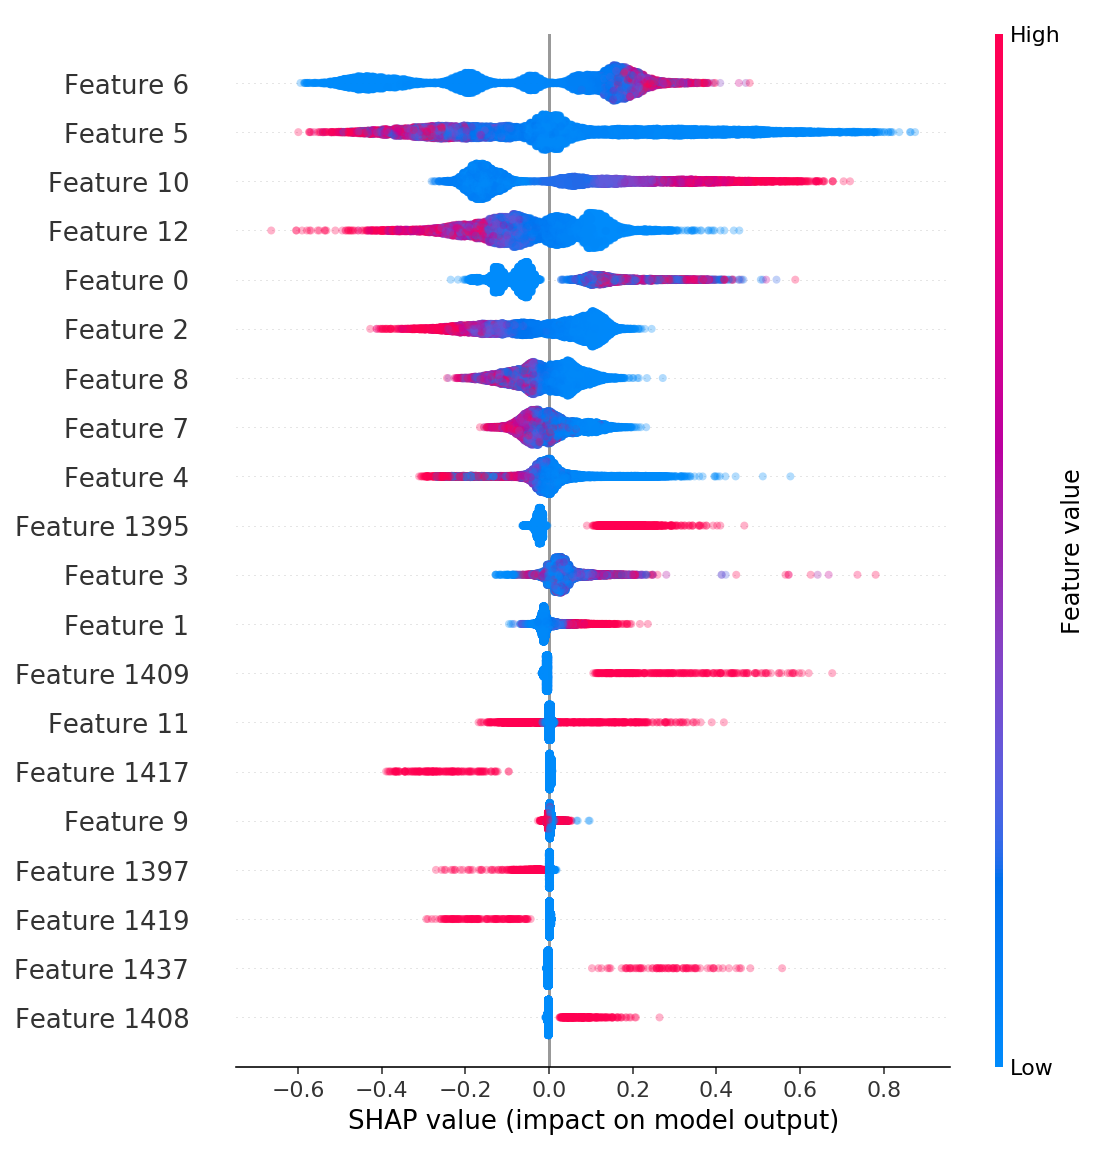

In [35]:
shap.summary_plot(shap_values, X_arr, max_display=20, alpha=0.3)

## [XGBoost features importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score)

In [36]:
def get_feature_score(booster, importance):
    gains_xgb = booster.get_score(importance_type=importance)
    gains = {}
    for f, g in gains_xgb.items():
        gains[f] = g
    sorted_gains = sorted(list(gains.items()), key=lambda x: -x[1])
    return sorted_gains


features_scores = get_feature_score(bst, 'gain')[:20]

In [37]:
import pandas as pd


f_names, f_scores = zip(*features_scores)
features_scores_pdf = pd.DataFrame({'feature': f_names, 'gain': f_scores})

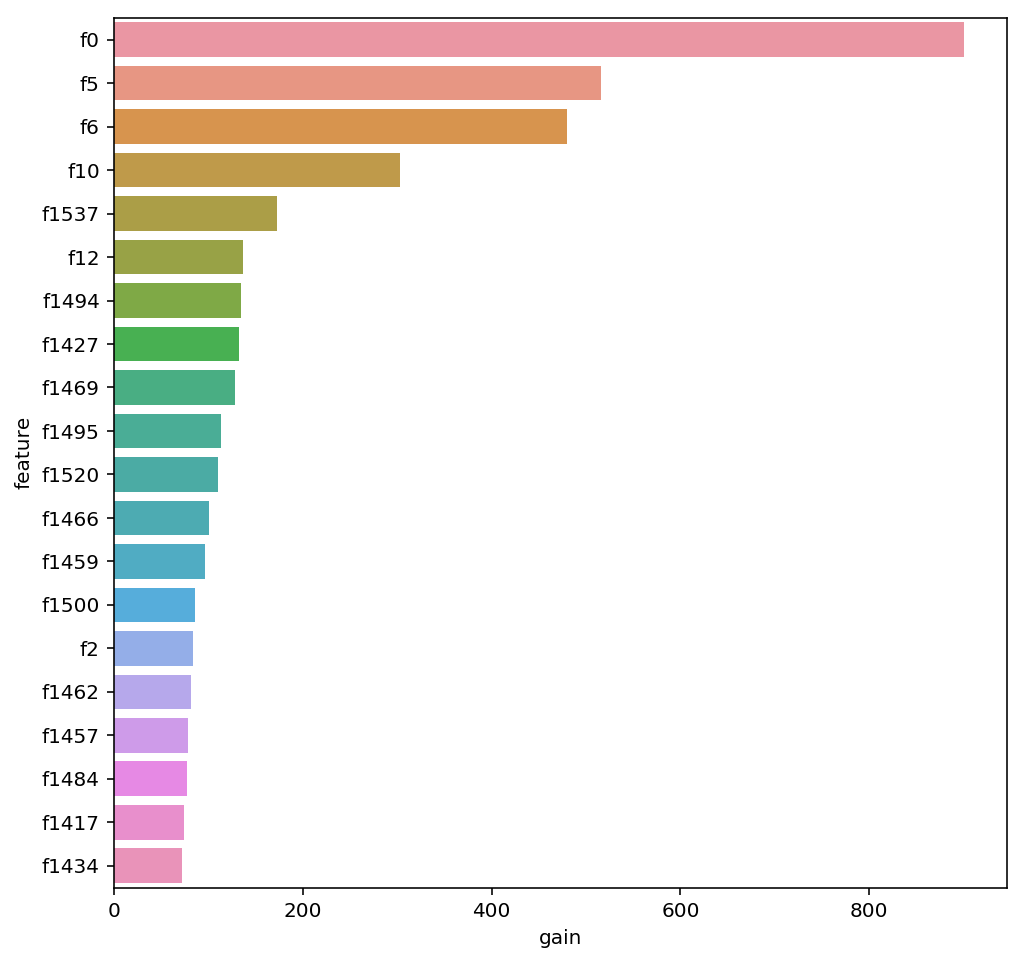

In [38]:
import seaborn as sns


_, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='gain', y='feature', data=features_scores_pdf)
plt.show()

# [Practical Lessons From Facebook](https://quinonero.net/Publications/predicting-clicks-facebook.pdf)

## Prepare Data

* Реализуйте модель из статьи (LogReg поверх XGBoost)

* Попробуйте реализовать Negatives Subsampling + Re-calibration описанный в статье (доп. баллы)

In [39]:
######################################
######### YOUR CODE HERE #############
######################################
model.transform(df, {'pred_leaf': True}).head()

Row(label=0, features=SparseVector(1945, {1: 53.0, 3: 10.0, 4: 6550.0, 5: 98.0, 6: 34.0, 7: 11.0, 8: 349.0, 10: 9.0, 12: 10.0, 13: 1.0, 1396: 1.0}), id=85, probabilities=DenseVector([0.6708, 0.3292]), prediction=0.0)

In [41]:
# import pyspark.sql.types.Vector
from pyspark.sql.types import IntegerType, ArrayType

def tree_leaves(vec):
    print(vec)
    data = []
    col_ind = []

    for idx, val in zip(vec.indices, vec.values):
        data.append(val)
        col_ind.append(idx)

    row_ind = [0] * len(col_ind)
    vcm = csr_matrix((data, (row_ind, col_ind)), shape=(1, dim))
#     return [int(i) for i in np.array(vcm.todense()).reshape(-1)]
#     return list(np.array(vcm.todense(), dtype=np.int32).reshape(-1))
    vdm = xgb.DMatrix(vcm)
    leaves = bst.predict(vdm, pred_leaf=True)
    return [int(i) for i in leaves[0]]

tmp = tree_leaves(df.take(1)[0].features)
print(tmp)
leaves_udf = F.udf(tree_leaves, ArrayType(IntegerType()))

df \
    .limit(1) \
    .withColumn('leaves', leaves_udf('features')) \
    .collect()

(1945,[1,3,4,5,6,7,8,10,12,13,1396],[53.0,10.0,6550.0,98.0,34.0,11.0,349.0,9.0,10.0,1.0,1.0])
[483, 479, 460, 441, 411, 408, 433, 388, 418, 358, 344, 368, 316, 336, 296, 290, 306, 242, 185, 277]


Py4JJavaError: An error occurred while calling o1179.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 72.0 failed 1 times, most recent failure: Lost task 0.0 in stage 72.0 (TID 255, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 366, in main
    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 241, in read_udfs
    arg_offsets, udf = read_single_udf(pickleSer, infile, eval_type, runner_conf)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 168, in read_single_udf
    f, return_type = read_command(pickleSer, infile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 69, in read_command
    command = serializer._read_with_length(file)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 172, in _read_with_length
    return self.loads(obj)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 580, in loads
    return pickle.loads(obj, encoding=encoding)
  File "/usr/lib/python3.5/site-packages/xgboost/core.py", line 1094, in __setstate__
    _LIB.XGBoosterUnserializeFromBuffer(handle, ptr, length))
  File "/usr/lib/python3.5/site-packages/xgboost/core.py", line 189, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [07:47:50] /workspace/src/objective/./regression_loss.h:89: Check failed: base_score > 0.0f && base_score < 1.0f: base_score must be in (0,1) for logistic loss, got: -0
Stack trace:
  [bt] (0) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN4dmlc15LogMessageFatalD2Ev+0x54) [0x7f38eb800614]
  [bt] (1) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost3obj18LogisticRegression12ProbToMarginEf+0xbf) [0x7f38ebaa623f]
  [bt] (2) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl9LoadModelEPN4dmlc6StreamE+0x17c3) [0x7f38eb8f4673]
  [bt] (3) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl4LoadEPN4dmlc6StreamE+0x313) [0x7f38eb8f2923]
  [bt] (4) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUnserializeFromBuffer+0x4e) [0x7f38eb7f08be]
  [bt] (5) /usr/lib64/libffi.so.5(ffi_call_unix64+0x4c) [0x7f390af4edac]
  [bt] (6) /usr/lib64/libffi.so.5(ffi_call+0x214) [0x7f390af4eb34]
  [bt] (7) /usr/lib64/python3.5/lib-dynload/_ctypes.cpython-35m-x86_64-linux-gnu.so(_ctypes_callproc+0x3ff) [0x7f390b161abf]
  [bt] (8) /usr/lib64/python3.5/lib-dynload/_ctypes.cpython-35m-x86_64-linux-gnu.so(+0xafc2) [0x7f390b15bfc2]



	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1889)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1877)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1876)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1876)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2110)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2048)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3263)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3260)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3370)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3369)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3260)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 366, in main
    func, profiler, deserializer, serializer = read_udfs(pickleSer, infile, eval_type)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 241, in read_udfs
    arg_offsets, udf = read_single_udf(pickleSer, infile, eval_type, runner_conf)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 168, in read_single_udf
    f, return_type = read_command(pickleSer, infile)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 69, in read_command
    command = serializer._read_with_length(file)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 172, in _read_with_length
    return self.loads(obj)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 580, in loads
    return pickle.loads(obj, encoding=encoding)
  File "/usr/lib/python3.5/site-packages/xgboost/core.py", line 1094, in __setstate__
    _LIB.XGBoosterUnserializeFromBuffer(handle, ptr, length))
  File "/usr/lib/python3.5/site-packages/xgboost/core.py", line 189, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [07:47:50] /workspace/src/objective/./regression_loss.h:89: Check failed: base_score > 0.0f && base_score < 1.0f: base_score must be in (0,1) for logistic loss, got: -0
Stack trace:
  [bt] (0) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN4dmlc15LogMessageFatalD2Ev+0x54) [0x7f38eb800614]
  [bt] (1) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost3obj18LogisticRegression12ProbToMarginEf+0xbf) [0x7f38ebaa623f]
  [bt] (2) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl9LoadModelEPN4dmlc6StreamE+0x17c3) [0x7f38eb8f4673]
  [bt] (3) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(_ZN7xgboost11LearnerImpl4LoadEPN4dmlc6StreamE+0x313) [0x7f38eb8f2923]
  [bt] (4) /usr/lib/python3.5/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUnserializeFromBuffer+0x4e) [0x7f38eb7f08be]
  [bt] (5) /usr/lib64/libffi.so.5(ffi_call_unix64+0x4c) [0x7f390af4edac]
  [bt] (6) /usr/lib64/libffi.so.5(ffi_call+0x214) [0x7f390af4eb34]
  [bt] (7) /usr/lib64/python3.5/lib-dynload/_ctypes.cpython-35m-x86_64-linux-gnu.so(_ctypes_callproc+0x3ff) [0x7f390b161abf]
  [bt] (8) /usr/lib64/python3.5/lib-dynload/_ctypes.cpython-35m-x86_64-linux-gnu.so(+0xafc2) [0x7f390b15bfc2]



	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:456)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:81)
	at org.apache.spark.sql.execution.python.PythonUDFRunner$$anon$1.read(PythonUDFRunner.scala:64)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:410)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$$anon$12.hasNext(Iterator.scala:440)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage3.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$13$$anon$1.hasNext(WholeStageCodegenExec.scala:636)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:255)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$2.apply(SparkPlan.scala:247)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.RDD$$anonfun$mapPartitionsInternal$1$$anonfun$apply$24.apply(RDD.scala:836)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:324)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:288)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [48]:
train_df.count()

1465971

## Train

In [43]:
######################################
######### YOUR CODE HERE #############
######################################

## Evaluation

In [35]:
def calibration(model, df):
    ######################################
    ######### YOUR CODE HERE #############
    ######################################
    pass

Сравните новую модель со всеми предыдущими с помощью `get_ate`. При сравнении использовать еще и метрику calibration

In [ ]:
######################################
######### YOUR CODE HERE #############
######################################

### Make a Submission

Если в результате работы получилась модель, которая лучше чем ЛогРег из предыдущей практики, то точно нужно сделать submission.